Convection linéaire pure en 1D 
-----
***

La convection linéaire est le problème de convection le plus simple à traiter en mécanique des fluides numérique.
Le terme non-linéaire est linéarisé. On suppose que la vitesse de convection est constante, elle est nommée $c$. L'équation de transport a l'expression, 

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0.$$

On définit une condition initiale sur l'ensemble du domaine. Soit donc une condition à $t=0$ telle que $u(x,t=0)=u_0(x)$. 

La solution exacte de cette équation est $u(x,t)=u_0(x-ct)$.

Nous allons discrétiser les opérateurs en espace et en temps. Nous utilisons pour ce faire un schéma de discrétisation amont (Forward difference scheme) pour la dérivée temporelle et un schéma de discrétisation aval (Backward difference scheme) pour le gradient de vitesse.

Le domaine 1D de longueur $L$ est discrétisé à l'aide de du pas d'espace $\Delta x$ constant. $\Delta x$ est la distance entre deux points. Pour identifier chaque point, on introduit l'indice $i$ qui permet de parcourir l'ensemble des points $N$ du domaine. Pour l'espace temporel, il est discrétisé avec un interval temporel $\Delta t$ et l'indice de parcours du domaine $T$ est $n$.

La dérivée d'une quantité $u(x,t)=u$ est défini par 

\begin{equation}
\frac{\partial u}{\partial x} = \lim_{\Delta x \rightarrow 0} \frac{u(x+\Delta x)-u(x)}{\Delta x}
\end{equation}

Le développement de Taylor de $u$ est définie par

\begin{eqnarray}
u( x ,t+\Delta t ) &=& u( x ,t) +  \sum_{ n = 1 }^T{ \frac{ (\Delta t)^n }{ n! } u^{(n)}( x,t ) } + o((\Delta t)^T) \\
u( x - \Delta x,t) &=& u( x ,t) + \sum_{ n = 1 }^N{ \frac{ (-\Delta x)^n }{ n! } u^{(n)}( x,t ) } + o((\Delta x)^N) 
\end{eqnarray}

En remplaçant $u( x ,t)$ par $u_i^{t}$, $u( x ,t+\Delta t )$ par $u_i^{t+1}$ et $u( x - \Delta x,t)$ par $u_{i-1}^n$, on obtient :


\begin{eqnarray}
u_i^{t+1} &=& u_i^{t} +  \sum_{ n = 1 }^T{ \frac{ (\Delta t)^n }{ n! } u^{(n)}( x,t ) } + o((\Delta t)^T) \\
u_{i-1}^n &=& u_i^{t} + \sum_{ n = 1 }^N{ \frac{ (\Delta x)^n }{ n! } u^{(n)}( x,t ) } + o((\Delta x)^N) 
\end{eqnarray}


L'équation discrétisée au premier ordre ($N=1$ et $T=1$) est alors :


\begin{eqnarray}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 
\end{eqnarray}

Cette expression est une formulation explicite de l'équation de transport discrétisée.
L'expression de $u_i^{n+1}$ est alors :

\begin{eqnarray}
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
\end{eqnarray}


In [1]:
import numpy  as np             #On charge la librairie Numpy
import matplotlib.pyplot as plt #On charge la librairie Matplotlib

# commande spéciale pour Jupyter
%matplotlib inline  

Définitssions maintenant les différentes variables du problème

In [2]:
L  = 12   # longueur du domaine
nx = 301  # nombre de points, soit nx-1 partitions
dx = L / (nx-1) # taille d'un segment Delta x
T  = 2.5  # temps d'intégration
nt = 101  # nombre de pas de temps
dt = T/(nt-1)  # taille du pas de temps
c = 1      # vitesse de convection c = 1

On va définir des conditions initiales au problème en fixant la variable $u(x,t=0)$.

On pose $u(x,t=0)=Y$ pour $[X_0 = 0.1;X_1 = 0.25]$ et $u(x,t=0)=0$ partout ailleur.


In [3]:
X0 = 0.1
X1 = 0.25
Y  = 2.
u = np.zeros(nx)     
u[int(X0 / dx):int(X1 / dx + 1)] = Y  
# print(u) # décommenter la ligne pour voir apparaître le vecteur u

[0. 0. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


On affiche la représentation de $u(x,t=0)$ sur un graphique. La commande np.linspace(0, L, nx) permet de créer un vecteur de valeurs comprises entre $0$ et $L$ contenant $nx$ points. Les valeurs de $u$ sont celles définies précédemment.

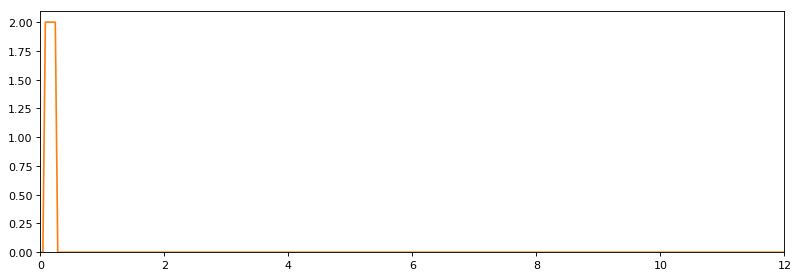

In [4]:
fig = plt.figure(figsize=(12, 4), dpi=80 )
ax = plt.axes(xlim=(0, L), ylim=(0, 2.1))
line, = ax.plot([], [], lw=2)

plt.plot(np.linspace(0, L, nx), u)

Maintenant que nous avons défini l'ensemble des paramètres et les conditions initiales, on va implémenter l'équation discrétisée précédente pour obtenir pour chaque pas de temps $n$ les solutions $u_i^{n+1}$. 


On crée tout d'abord un vecteur $un$ qui nous sert à stocker les champs à l'instant précédent $u_i^n$. Pour ce faire, on utilise la fonction empty() de numpy.

In [5]:
un = np.zeros(nx) # initialisation du vecteur un

for n in range(nt):  # boucle pour parcourrir l'ensemble des pas de temps
    un = u.copy()  
    for i in range(1, nx): ## boucle pour parcourir l'ensemble des pas d'espace
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1]) # implémentation de la fonction déterminée précédemment
        
        

Maintenant on va exploiter l'ensemble de ces élements pour faire un programme avec une représentation graphique animée afin de comparer la solution analytique et la solution numérique.

In [6]:
from matplotlib import animation, rc
from IPython.display import HTML


def setu(x0,x1,y):
    U = np.zeros(nx) 
    U[int(x0 / dx):int(x1 / dx + 1)] = y  
    
    return (U)

fig = plt.figure(figsize=(12, 4), dpi=80 )
ax = plt.axes(xlim=(0, 12), ylim=(0, 2.1))
line, = ax.plot([], [], lw=2)
line_ana, = ax.plot([], [], lw=2)

plt.plot()
plt.close()

X0 = 0.1
X1 = 0.25
Y  = 2

u = np.zeros(nx)     #
u = setu(X0,X1,Y)

uana = np.zeros(nx)      #
uana = setu(X0,X1,Y)

un = np.zeros(nx) #

x = np.linspace(0, L, nx)

def animate(i):
    
        un = u.copy() ##
        for j in range(1, nx): ## 
                ## *np.sign(i) est ajouté ici pour éliminer des artéfacts de la fonction FuncAnimation 
                ## qui charge à de multiples reprises animate(i) avec i=0
                u[j] = un[j] - np.sign(i) * (c* dt / dx * (un[j] - un[j-1]))
        line.set_data(x, u)

        uana=setu(X0+c*dt*(i+1),X1+c*dt*(i+1),Y)
        line_ana.set_data(x, uana)

        return (line_ana,line,)

anim = animation.FuncAnimation(fig, animate,frames=400, interval=50, blit=True) # 400 * 50 = 20000 ms soit 20s

HTML(anim.to_html5_video()) # Affichage de la vidéo

Que pouvons nous conclure sur cette modélisation numérique ?

Est-ce qu'elle représente fidèlement la solution analytique ?

Si vous changez les paramètres $nx$ et $nt$, que se passe-t-il ? avec des paramètres plus grands ou plus petits, par exemple $nx=481~ou~nx=841$ ?  Que se passe-t-il ?